<hr>

<center>
    Class: Machine Learning in Computational Biology <br>
    Program: Data Science and Information Technologies <br>
    Name: Aris <br>
    Las name: Podotas <br>
    ID: 7115152400040 <br>
    Assignment: 2 <br>
</center>

<hr>

## Exercise 1
 The function is a step function that increases the output values by a variable amount with step $30$. The minimum intensity is $10$ and the maximum is $200$ which is less than the input range on both ends. This should generally dim the image to some degree. Let us compare this function to one that does not alter the image
![function](../figures/step_fun_vs_y_eq_x.png)
*Figure 1:* Comparing the step function to one that does not alter the image

Here we can see the dimming effect considering the step function is \textit{almost} always under the $y = x$ function that does not alter the image.   Since the function assigns an input range to a singular value we can expect some quantization of the output images. This should leave the output looking like a lower quality image and it will also be easier to compress but it will also be the same resolution right after the transformatioi
.


In [1]:
import numpy as np
from PIL import Image

def req1(img: Image.Image) -> Image.Image:
    """Applies the step function from requirement 1"""
    def step(img: Image.Image) -> np.ndarray[int]:
        """Generates the numpy array with the transformation"""
        im = np.array(img)
        output: np.ndarray = np.copy(im) # Copy by value
        def interpolate(value: int) -> int:
            """Will calculate the new value"""
            # I wish I could have come up with something better but
            holder: int = -1
            if value <= 30:
                holder = 10
            elif 30 < value <=60:
                holder = 20
            elif 60 < value <= 90:
                holder = 50
            elif 90 < value <= 120:
                holder = 70
            elif 120 < value <= 160:
                holder = 100
            elif 160 < value <= 190:
                holder = 140
            elif 190 < value <= 220:
                holder = 180
            else:
                holder = 200
            return holder
        it = np.nditer(im, ['multi_index'])
        while not it.finished :
            shape = it.multi_index
            new: int = interpolate(it[0])
            # Apply transformations
            output[shape] = new
            # Iterate
            it.iternext()
        return output
    output: Image.Image = Image.fromarray(step(img = img))
    return output

holder = req1(Image.open('../figures/req1b.png'))
holder.save('../figures/req1a.png')



## Example

You can find the files that perform this transformation 
[here](https://github.com/ArisPodotas/Image-Processing-EX1/blob/master/src/req1.py).

![function](../figures/req1b.png)

*Figure 2:* Image before the transformation

![function](../figures/req1a.png)

*Figure 3:* Image after the transformation

### Table: Comparison of Images

| **Image** | **File Size (disk)** | **Shape**          |
|-----------|----------------------|--------------------|
| Before    | 3.29 MB              | 1861 × 2048        |
| After     | 652 KB               | 1861 × 2048     a


We can see the quantization into a lower quality image while maintaining the same dimensio much lower disk space. 

<hr>

# Exercise 2 <a name="sec:ex2"></a>

A gamma correction with a **G** of more than 1 would lighten the image in the perception of the human eye.

---

# Exercise 3 <a name="sec:ex3"></a>

The requirement says *"a method"*, implying one — but multiple transformations can be assigned to one method.

### Table: Method Proposals

| **Method**                | **Goal**                                         |
|---------------------------|--------------------------------------------------|
| Gamma correction          | Accommodating for the perception of the human eye |
| Adding a constant         | To bring up every pixel's brightness             |
| Multiplying by a constant | To bring up every pixel's brightness             |

Any one of the proposals, or a combination of them, would make the image appear brighter.

---

# Exercise 4 <a name="sec:ex4"></a>

Taking a look at the image, we can assume a **median filter** would not be suited to sharpening this image considering the edges and smooth regions.  
We should use a transformation that **enhances the edges** of the image.

If we took the **Laplacian** of the image and used the isolated edges to alter only those pixels in the original image, we would effectively increase the **contrast of the edges** and make the image look sharper.

> **Proposal**:  
> Apply a **gamma filter** only to the pixels of the image that the **Laplacian isolates** (**G ≥ 1**, ideally).

<hr>

# Exercise 5 <a name="sec:ex5"></a>

Let's look at some of the descriptive values for both images with our visual overview.

### Table: Comparison of Image_1 and Image_2

| **Image**   | **Size**         |
|-------------|------------------|
| Image_1     | 800 × 641        |
| Image_2     | 800 × 641        |

Visually, it seems like we have just taken the **negative** of the image. Since the scale and positioning of elements in the image haven’t changed, we can assume a **negative transformation** has occurred.

Upon zooming in, we can see that **Image_2** has some quality nuance — but **Image_1** exhibits the same effect as well.

### Negative Transformation

The steps taken are those of getting the **negative of an image**, which is defined by:

$f(x) = 255 - x$


To reverse this transformation, we need a function (let's call it **g(x)**) such that:

$
g(f(x)) = x \iff g(255 - x) = x \iff
g(x) = f(x) - 255 - x
$

<hr>

# Exercise 6

Before any of the following, you will be able to find all source files in [this repository]( https://github.com/ArisPodotas/Image-Processing-EX1/tree/master).


In [2]:
from PIL import Image
import numpy as np
import cv2 as cv

def edges(img: np.ndarray[int, ...], kernel: np.ndarray[int, ...]) -> np.ndarray[int, ...]:
    """Isolates the edges with a laplacian matrix"""
    #laplacian
    blur: np.ndarray = cv.GaussianBlur(img,(3,3),0)
    output: np.ndarray = cv.filter2D(blur, -1, kernel)
    return output

def main() -> None:
    """Applies things"""
    matrix = np.array([[0,1,0],[1,-4,1],[0,1,0]])
    kernel = np.array([[1,1,1],[1,-8,1],[1,1,1]])
    output: np.ndarray = edges(cv.imread('../data/image11.jpg'), matrix)
    Image.fromarray(output).save('../figures/Image_11_edges.jpg')
    output: np.ndarray = edges(cv.imread('../data/image11.jpg'), kernel)
    Image.fromarray(output).save('../figures/Image_11_edges_rough.jpg')

main()


This is sufficient for the edges of the image

![function](../figures/Image_11_edges_rough.jpg)

*Figure 4:* Laplacian edge detection using the second kernel

Most of the edges in the background are not rought enough to be captured here though a little bit of the waves nad the mountain peak are captured.

Thankfully for the next question the ```cv2``` library has a ```HoughLInes``` function that outputs the angles since otherwise the implementation might have been quite difficult.

r: 57.0, theta: 2.356194496154785
r: 49.0, theta: 2.356194496154785
r: 419.0, theta: 0.7853981852531433
r: 62.0, theta: 2.356194496154785
r: 412.0, theta: 0.7853981852531433
r: 78.0, theta: 2.356194496154785
r: 69.0, theta: 2.356194496154785
r: 54.0, theta: 2.356194496154785
r: 416.0, theta: 0.7853981852531433
r: 402.0, theta: 0.7853981852531433
r: 414.0, theta: 0.7853981852531433
r: 71.0, theta: 2.356194496154785
r: 66.0, theta: 2.356194496154785
r: 455.0, theta: 0.7853981852531433
r: 413.0, theta: 0.8203047513961792
r: 390.0, theta: 0.7853981852531433
r: 100.0, theta: 2.356194496154785
r: 392.0, theta: 0.7853981852531433
r: 395.0, theta: 0.7853981852531433
r: 64.0, theta: 2.356194496154785
r: 47.0, theta: 2.356194496154785
r: 371.0, theta: 0.7853981852531433
r: 383.0, theta: 0.7853981852531433
r: 424.0, theta: 0.7853981852531433
r: 40.0, theta: 2.356194496154785
r: 52.0, theta: 2.356194496154785
r: 397.0, theta: 0.7853981852531433
r: 272.0, theta: 2.0420351028442383
r: 387.0, theta: 

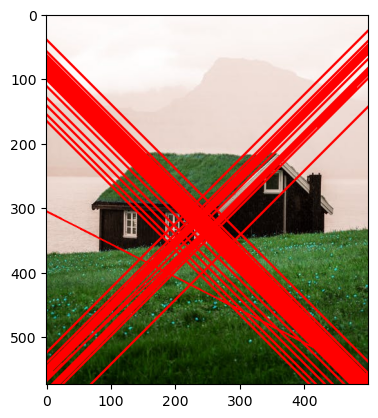

In [3]:
import matplotlib.pyplot as plt
from cv2.typing import MatLike
import cv2 as cv

def angles(img: np.ndarray[int, ...]) -> MatLike:
    """Will find the angles of the lines in the image"""
    lines: MatLike = cv.HoughLines(
        cv.Canny(
            cv.cvtColor(
                img,
                cv.COLOR_BGR2GRAY
            ),
            50,
            10
        ),
        1,
        np.pi/180,
        240
    )
    for line in lines:
        for r, theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*r
            y0 = b*r
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            cv.line(img,(x1,y1),(x2,y2),(255,0,0),2)
            print(f'r: {r}, theta: {theta}')
    plt.imshow(img)
    return lines
    
def main() -> None:
    """Applies things"""
    image: MatLike = cv.imread('../data/image11.jpg')
    angles(image)

main()

We have two categories of lines roughly with the given parameters, one of which is the roof. we have lines of the type $r \eqsim 400, \theta \eqsim 0.78$ and $r \eqsim 50, \theta \eqsim 2.35$. The lines generated by other materials of the image and not the roof are parallel to the other side of the roof (seeing as to how the ones that are from the roof are perpendicular to the other side of the roof and also perpendicular to the other lines).

Corner at: (432, 309)
Corner at: (414, 246)
Corner at: (266, 302)
Corner at: (424, 246)
Corner at: (77, 302)
Corner at: (135, 332)
Corner at: (204, 344)
Corner at: (191, 324)
Corner at: (342, 271)
Corner at: (360, 271)


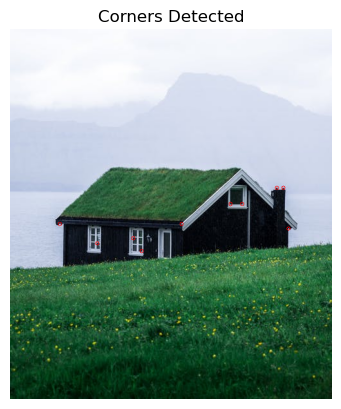

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def corners(img: np.ndarray) -> None:
    """Isolates the corners of the image"""
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    corners = cv.goodFeaturesToTrack(gray, 10, 0.1, 10)
    if corners is not None:
        corners = np.intp(corners)
        for i in corners:
            x, y = i.ravel()
            print(f"Corner at: ({x}, {y})")
            cv.circle(img, (x, y), 3, (0, 0, 255), 1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title("Corners Detected")
    plt.axis('off')
    plt.show()

def main() -> None:
    """Applies things"""
    image: np.ndarray[ing, ...] = cv.imread('../data/image11.jpg')
    corners(image)

main()


Our windows are the leftmost values of the printed ones, we have 10 corners in general and we can see 3 of them are false, the right most two and the left most one. Of the printed values the ones that do not correspond to windows are $(77,302)$, ($432, 309$) ($414, 246$) 

r: 335.0, theta: 0.6806784272193909
r: 351.0, theta: 0.6632251143455505


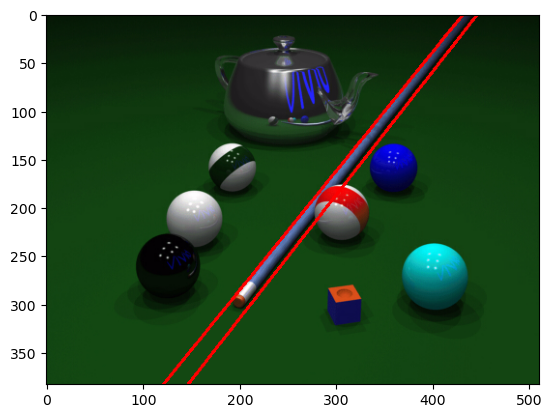

In [5]:
def main() -> None:
    """Applies things"""
    image = cv.imread('../data/image31.png')
    angles(image)

main()

[[   0.77757272   -0.62879302  177.13282082]
 [   0.62879302    0.77757272 -117.74739677]]


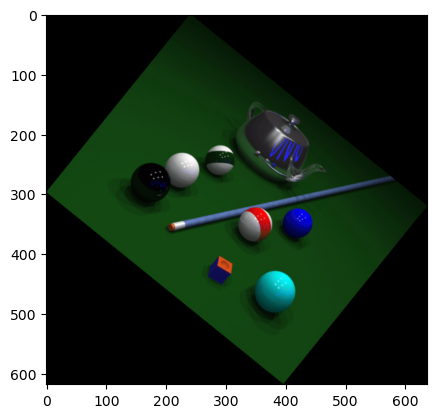

In [22]:
def rotate(image: np.ndarray) -> np.ndarray[int, ...]:
    height, width = image.shape[:2] # You cant annotate 
    center = (width / 2, height / 2)
    # Im not going to call the angles function since then i cant get it to overwrite the previed image from that function for some reason
    rotation_matrix = cv.getRotationMatrix2D(center, - np.degrees(0.68), 1.0) # It took me longer than im willing to admit to realise this works but only with degrees
    print(rotation_matrix)
    cos = abs(rotation_matrix[0, 0])
    sin = abs(rotation_matrix[0, 1])
    new_width = int((height * sin) + (width * cos))
    new_height = int((height * cos) + (width * sin))
    # Getting it to the new center
    rotation_matrix[0, 2] += (new_width / 2) - center[0]
    rotation_matrix[1, 2] += (new_height / 2) - center[1]
    rotated = cv.warpAffine(image, rotation_matrix, (new_width, new_height))
    return rotated

# No point in re defining a main function I realised 
image = cv.imread('../data/image31.png')

rotated: np.ndarray[int, ...] = rotate(image)
plt.imshow(rotated)


Our angles are a bit off by an exceptionally small margin which might be a truncation issue

I am going to conduct some test before doing the last requirement to form a strategy

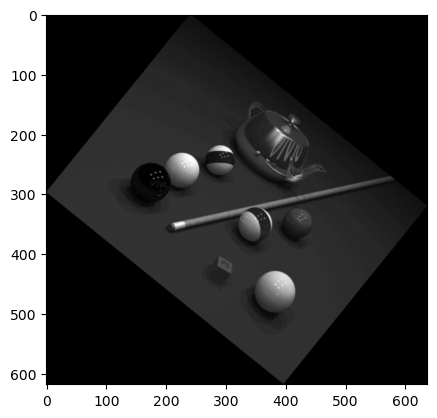

In [15]:
rotated_bw = cv.cvtColor(rotated, cv.COLOR_BGR2GRAY)
plt.imshow(rotated_bw, cmap='gray')

r: -152.0, theta: 2.251474618911743
r: 231.0, theta: 2.251474618911743
r: 186.0, theta: 0.6806784272193909
r: 696.0, theta: 0.6806784272193909


array([[[-1.5200000e+02,  2.2514746e+00]],

       [[ 2.3100000e+02,  2.2514746e+00]],

       [[ 1.8600000e+02,  6.8067843e-01]],

       [[ 6.9600000e+02,  6.8067843e-01]]], dtype=float32)

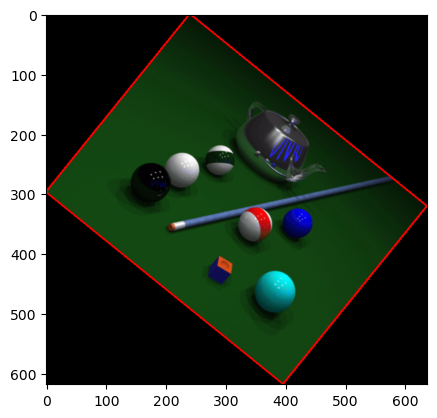

In [16]:
angles(rotated)

Based on the above result the approach will be to get the lines of the original image in to parameters and turn every pixel outside of the lines to black ($0$), then to rotate since we have that function and convert to black and white.

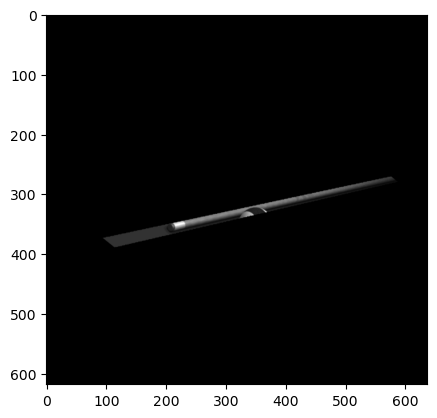

In [17]:
def stripe(img: np.ndarray[int, ...]) -> np.ndarray[int, ...]:
    """Keep only the pixels between two lines y = (r - x cos(theta)) / sin(theta)"""
    output: np.ndarray[int, ...] = np.zeros_like(img)
    lines: MatLike = cv.HoughLines(
        cv.Canny(
            cv.cvtColor(
                img,
                cv.COLOR_BGR2GRAY
            ), 
            50,
            10
        ),
        1,
        np.pi/180,
        240
    )
    # Python wont let me type hind tuple declarations
    r1, theta1 = lines[0][0]
    r2, theta2 = lines[1][0]
    h, w = img.shape[:2]
    for y in range(h):
        for x in range(w):
            y1 = (r1 - x * np.cos(theta1)) / np.sin(theta1)
            y2 = (r2 - x * np.cos(theta2)) / np.sin(theta2)
            ymin = min(y1, y2)
            ymax = max(y1, y2)
            if ymin <= y <= ymax:
                output[y, x] = img[y, x]
    return output
    
image = cv.imread('../data/image31.png')
holder = stripe(image)
rotated = rotate(holder)
rotated_bw = cv.cvtColor(rotated, cv.COLOR_BGR2GRAY)
plt.imshow(rotated_bw, cmap= 'gray')
